# Understanding Descriptive Statistics

Import the necessary libraries here:

In [24]:
import pandas as pd
import numpy as np
import random 

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [25]:
items = np.random.randint(1,7,size=10)
data = pd.DataFrame(items, columns=['Dice number'])

data

,Dice number
0,5
1,1
2,4
3,2
4,6
5,5
6,4
7,3
8,5
9,2


#### 2.- Plot the results sorted by value.

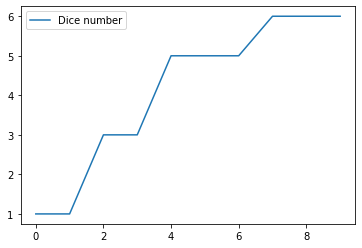

In [51]:
import matplotlib
%matplotlib inline

data = data.sort_values(by=['Dice number']).reset_index()

data[['Dice number']].plot(); 

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

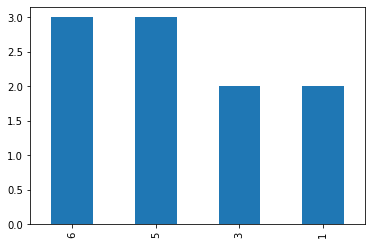

In [155]:
freq = data['Dice number'].value_counts()
freq.plot(kind='bar', y='freq');

In [ ]:
"""
The difference between those 2 plots is that the first one is the result of every roll.
The Second one is how many a number has been rolled in those 10 times. 
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [69]:
def mean (x):
    total = 0
    length = len(x['Dice number'])
    for dice in x['Dice number']: 
        total += dice
    return total/length
        
print(mean(data))

4.1


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [152]:
from collections import Counter


def mean_two (x):
    col = input("Give the column you want.")
    dice_rolls = [dice for dice in x[col]]
    length = len(dice_rolls)
    my_diction = Counter(dice_rolls)
    total = 0
    for key, value in my_diction.items(): 
        num1 = key
        num2 = value
        total += (num1*num2)
    solution = total/length
    return solution

print(mean_two(data))
            

Give the column you want.Dice number
4.1


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [45]:
def my_med (x):
    col = input("Give the column you want: ")
    dice_rolls = [dice for dice in x[col]]
    dice_rolls.sort()
    length = len(dice_rolls)
    if length % 2 == 0: 
        num1 = int(length/2)-1
        num2 = int(length/2)
        median = (dice_rolls[num1]+dice_rolls[num2])/2
        pass
    else:
        num1 = length/2
        median = dice_rolls[num1]
        pass
    return median 

print(my_med(data))

Give the column you want: Dice number
4.0


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [49]:

def quartiles (x):
    lst = []
    col = input("Give the column you want: ")
    dice_rolls = [dice for dice in x[col]]
    dice_rolls.sort()
    length = len(dice_rolls)
    if len(dice_rolls)%2 == 0: 
        num1 = int(length/2)-1
        num2 = int(length/2)
        lst.append(num1)
        lst.append(num2)
        Q1 = dice_rolls[:lst[0]]
        Q2 = dice_rolls[lst[1]:]
    else: 
        num1 = length/2
        lst.append(num1)
        Q1 = dice_rolls[:lst[0]]
    lQ1 = len(Q1)
    lQ2 = len(Q2)
    if lQ1 % 2 == 0: 
        num1 = int(lQ1/2)-1
        num2 = int(lQ1/2)
        median_Q1 = (Q1[num1]+Q1[num2])/2
    else:
        num1 = lQ1/2
        median_Q1 = Q1[num1]
    if lQ2 % 2 == 0: 
        num1 = int(lQ2/2)-1
        num2 = int(lQ2/2)
        median_Q2 = (Q2[num1]+Q2[num2])/2
    else:
        num1 = int(lQ2/2)
        median_Q2 = Q2[num1]
    return str(median_Q1)+" "+str(median_Q2)

print(quartiles(data))


#I know that Q1 is the median for the numbers of the first part up till but excluded median and 
#I know that Q3 is the median for the number of the second from the median (excl.) till the end. 

Give the column you want: Dice number
2.0 5


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1


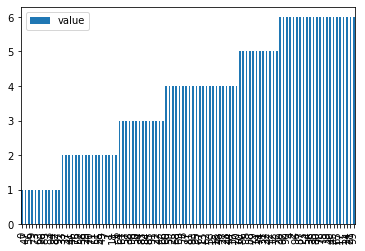

In [150]:
data3 = pd.read_csv('/Users/bert/Desktop/dataV2-labs/module-2/Descriptive-Stats/data/roll_the_dice_hundred.csv')
data3 = data3.sort_values(by=['value'])
data3.plot(kind='bar', y='value'); 
data3.head(5)

In [151]:
"""
I see a graph that I was expacting but it's not clear because there are too many rolls...
You also see the different results and you can see how it's distributed. 
"""

"\nI see a graph that I was expacting but it's not clear because there are too many rolls...\nYou also see the different results and you can see how it's distributed. \n"

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [153]:
print(mean_two(data3))

Give the column you want.value
3.74


#### 3.- Now, calculate the frequency distribution.


In [158]:
freq2 = data3['value'].value_counts()
freq2

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

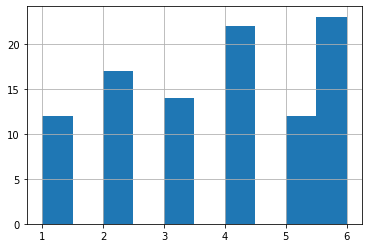

In [163]:
# I only select the histogram for the dice_roll because else you also see the column unnamed & Roll_number.
# Those other columns aren't useful for us.

data3['value'].hist(); 

In [ ]:
"""
In this histogram we can see how many times the number on the dice appears in the 100 rolls. 
The mean give us the average value of a certain set. Because we have here only a number of possible outcomes we can't
go on with average/mean.
"""

Unnamed: 0    49.50
roll          49.50
value          3.74
dtype: float64

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

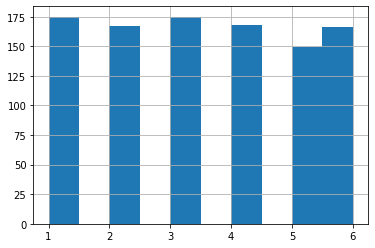

In [168]:
data4 = pd.read_csv('/Users/bert/Desktop/dataV2-labs/module-2/Descriptive-Stats/data/roll_the_dice_thousand.csv')
data4['value'].hist()

In [ ]:
"""
The distribution has certainly changed!
If it's a fair dice you have as much chance of throwing a number from 1 to 6 (1 out of 6). 
In the previous distribution it looked like you had more chance to throw a 4 or 6. 
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

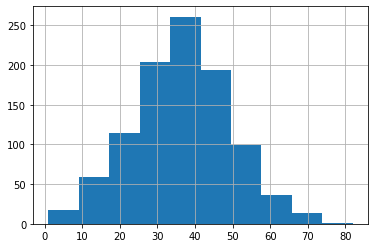

In [180]:
age_one = pd.read_csv('/Users/bert/Desktop/dataV2-labs/module-2/Descriptive-Stats/data/ages_population.csv')
freq_age = age_one['observation'].value_counts()
freq_age.head(50)
age_one['observation'].hist();

In [179]:
"""
What we see here is what we called a +/- normal distribution. 
We can say that the mean shall be between the upper 30 and 40.
Because it's a +/- normal distribution we can say that the most values are between 2 times the standard deviation. 
On base of here I would say that the standaard deviation is +/- 8 
"""

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [190]:
avg = age_one['observation'].mean()
avg

36.56

In [183]:
standaard_dev = age_one['observation'].std()
standaard_dev

12.816499625976762

In [ ]:
"""
I had predicted that the average would be between 40 and high 30 and with an average of 36.56 I was not far off.
For the standard deviaton I was also not so far from what I thought. 
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [187]:
age_two = pd.read_csv('/Users/bert/Desktop/dataV2-labs/module-2/Descriptive-Stats/data/ages_population2.csv')
#age_two.head()

freq_age_two = age_two['observation'].value_counts()
freq_age_two

28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
30.0     90
24.0     78
31.0     61
23.0     41
22.0     35
32.0     31
33.0     22
21.0     17
20.0     13
34.0      7
35.0      3
19.0      3
36.0      2
Name: observation, dtype: int64

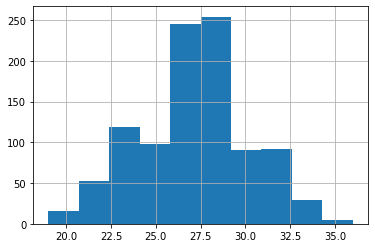

In [188]:
age_two['observation'].hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Yes there is a big difference between this one and the one in step 1. 
here we have a different distribution and will no longer fall within the normal distribution. 
The ages of those 1000 people are also closer togehter --> so normaly there will be a smaller standard deviation. 

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [189]:
avg_two = age_two.mean()
avg_two

observation    27.155
dtype: float64

In [193]:
std_two = age_two.std()
std_two

observation    2.969814
dtype: float64

In [ ]:
"""
The standard deviation is of course smaller because the ages of these new data are more in line with each other.
(are closer together). 

The mean is this second is smaller and that's correct because there is only a range between just onder 20 years and 
just above 35 years old. 
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [6]:
age_3 = pd.read_csv('/Users/bert/Desktop/dataV2-labs/module-2/Descriptive-Stats/data/ages_population3.csv')
#age_3.head(10)

freq_age_3 = age_3['observation'].value_counts()
freq_age_3

32.0    37
35.0    31
37.0    31
39.0    29
36.0    26
        ..
76.0     1
9.0      1
1.0      1
5.0      1
7.0      1
Name: observation, Length: 75, dtype: int64

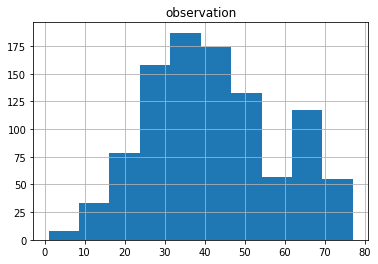

In [7]:
age_3.hist(); 

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [8]:
avg_3 = age_3.mean()
avg_3

observation    41.989
dtype: float64

In [9]:
std_3 = age_3.std()
std_3

observation    16.144706
dtype: float64

In [10]:
"""
If we look to both data_sets we can see that there are a lot more older people than in the age_one. 
Because there are more older people we could expect that the mean shall be higher. 
"""

'\nIf we look to both data_sets we can see that there are a lot more older people than in the age_one. \nBecause there are more older people we could expect that the mean shall be higher. \n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [16]:
Q1 = age_3.quantile(0.25)
Q1

observation    30.0
Name: 0.25, dtype: float64

In [17]:
Q2 = age_3.median()
Q2

observation    40.0
dtype: float64

In [14]:
Q3 = age_3.quantile(0.75)
Q3

observation    53.0
Name: 0.75, dtype: float64

In [ ]:
"""
There is a very little difference between the mean and the median because are arrround the age of 40. 
The median is the number in the middle but the mean can fluctuate according to possible outliers 
so if there are a few people over 100 years old, the average will rise rapidly but the median will 
always remain in the middle.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [23]:
#/

observation    22.0
Name: 0.1, dtype: float64

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""